# K Means Research

### Brandon Novak

### March 17th, 2021

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from PIL import Image, ImageOps
import math

In [13]:
#load in image and convert into numpy array 
def load_image_as_numpy(photo):
    original = Image.open(photo)
    resized = original.resize((320,320),Image.ANTIALIAS)
    image = resized.copy()
    plt.imshow(image)
    plt.show()
    imageBW = image.convert("L")
    plt.imshow(imageBW, cmap='gray')
    plt.show()
    a = np.asarray(image,dtype=np.float64)
    b = a.copy()
    a = np.asarray(imageBW,dtype=np.float64)
    bw = a.copy()
    return b, bw

In [14]:
@ignore_warnings(category=ConvergenceWarning)
def remake_image(RGB_array, k=0):
    #make sure RGB_array is reshaped correctly (-1,1)
    RGB_array_1 = RGB_array.reshape((-1,1))
    if k == 0:
        kmeans = KMeans(n_init = 20).fit(RGB_array_1)
        centers = kmeans.cluster_centers_
        labels = kmeans.labels_
        print("Number of clusters used: " + str(kmeans.n_clusters))
    else:
        kmeans = KMeans(n_clusters = k, n_init = 20).fit(RGB_array_1)
        centers = kmeans.cluster_centers_
        labels = kmeans.labels_
    f=[]
    centers=centers.squeeze()
    for i in labels:
        f.append(centers[i])
    final=np.asarray(f)
    final=final.reshape(RGB_array.shape)
    final = final/255
    plt.imshow(final, cmap='gray')
    plt.show()

In [15]:
def create_error_graphs(RGB_array, grey_array):
    L = [RGB_array, grey_array]
    for i in L:
        error = []
        k_values = []
        i = i.reshape((-1,1))
        for k in range(1,21):
            kmeans = KMeans(n_clusters = k, n_init = 20).fit(i)
            k_values.append(k)
            error.append(kmeans.inertia_)
        plt.figure()
        plt.plot(k_values, error)
        plt.xticks(k_values)
        plt.xlabel("k value")
        plt.ylabel("Error")
        plt.ylim([0, 1e9])
        plt.show()

# Swasey Chapel

## Return Swasey as a RGB and grayscale

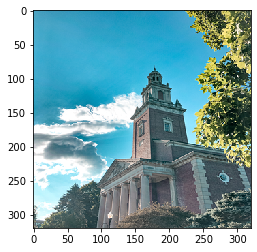

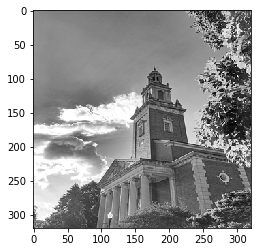

In [16]:
swasey, swaseyBW = load_image_as_numpy("Swasey.jpeg")

## Find best K by identifying the elbow 

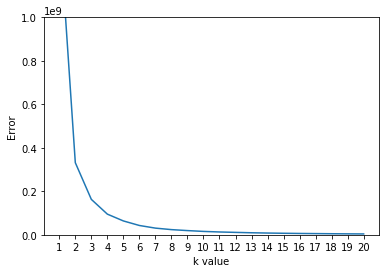

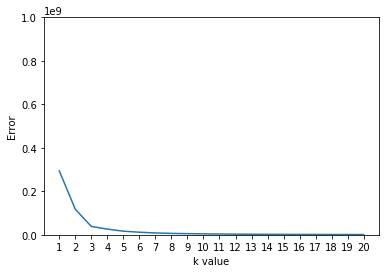

In [17]:
create_error_graphs(swasey, swaseyBW)

## Remake each image using vector quantization

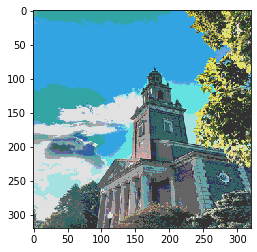

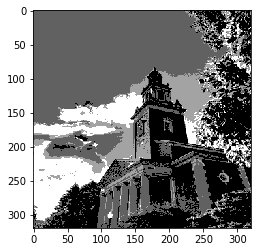

In [18]:
remake_image(swasey, 4)
remake_image(swaseyBW, 3)

# Olin Hall

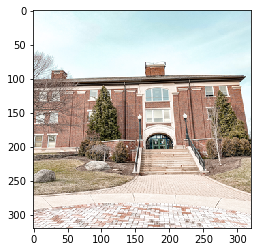

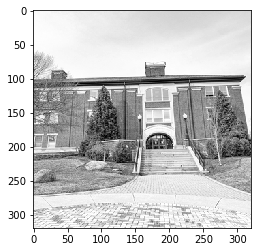

In [19]:
Olin, OlinBW = load_image_as_numpy("Olin.JPG")

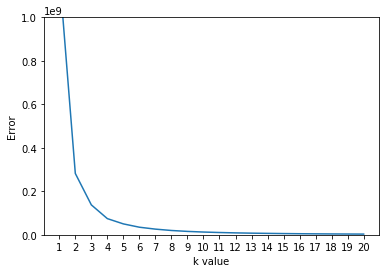

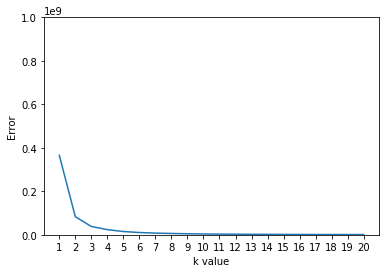

In [20]:
create_error_graphs(Olin, OlinBW)

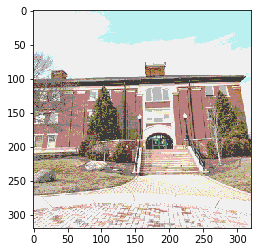

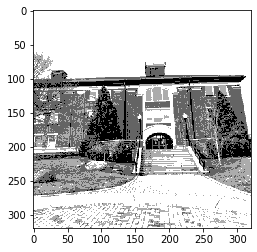

In [21]:
remake_image(Olin, 3)
remake_image(OlinBW, 3)

In [22]:
def load_image_no_lumin(photo):
    original = Image.open(photo)
    resized = original.resize((320,320),Image.ANTIALIAS)
    image = resized.copy()
    plt.imshow(image)
    plt.show()

    a = np.asarray(image,dtype=np.float64)
    img = a.copy()
    H,W = img.shape[:2]
    gray = np.zeros((H,W), np.uint8)
    for i in range(H):
        for j in range(W):
            gray[i,j] = np.clip((img[i,j,0]  + img[i,j,1] + img[i,j,2])/3, 0, 255)

    plt.imshow(gray, cmap='gray')
    plt.show()
    a = np.asarray(gray,dtype=np.float64)
    bw = a.copy()
    
    return img, bw

def load_image_with_lumin(photo):
    original = Image.open(photo)
    resized = original.resize((320,320),Image.ANTIALIAS)
    image = resized.copy()
    plt.imshow(image)
    plt.show()

    a = np.asarray(image,dtype=np.float64)
    img = a.copy()
    H,W = img.shape[:2]
    gray = np.zeros((H,W), np.uint8)
    for i in range(H):
        for j in range(W):
            gray[i,j] = np.clip(0.11 * img[i,j,0]  + 0.59 * img[i,j,1] + 0.3 * img[i,j,2], 0, 255)

    plt.imshow(gray, cmap='gray')
    plt.show()
    a = np.asarray(gray,dtype=np.float64)
    bw = a.copy()
    
    return img, bw

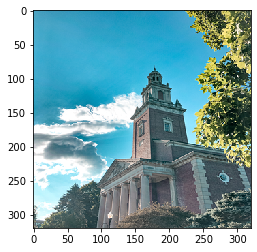

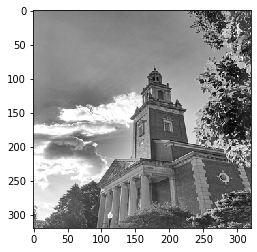

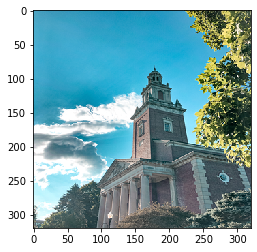

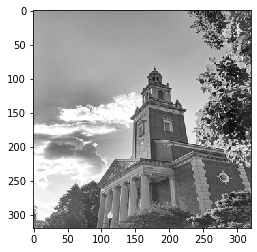

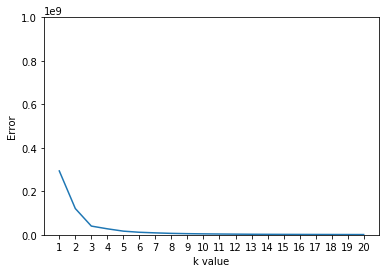

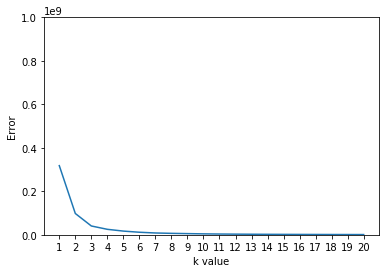

In [23]:
swasey, no_lumin = load_image_no_lumin("Swasey.jpeg")
swasey, with_lumin = load_image_with_lumin("Swasey.jpeg")
create_error_graphs(no_lumin, with_lumin)

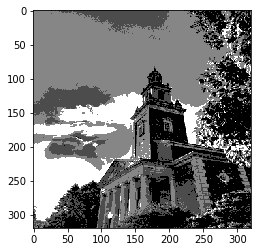

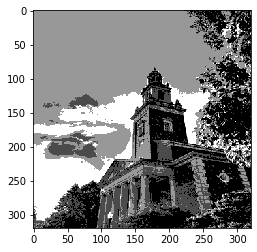

In [24]:
remake_image(no_lumin, 4)
remake_image(with_lumin, 4)